<center><img src=img/MScAI_brand.png width=70%></center>

# The Fourier Transform and Spectrogram

Fourier: any signal is a sum of sinusoidal signals.

Helmholtz: any sound is a sum of sinusoidal tones.

Tangent: "Fourier's consideration of the possibility that the Earth's atmosphere might act as an insulator of some kind is widely recognized as the first proposal of what is now known as the greenhouse effect" (Wikipedia)

The Fourier transform is a core building-block of the study of signals. It decomposes a signal into a sum of sinusoidal signals of different frequencies. We can then see how much *energy* is present at each frequency.

<center><img src=img/fourier-transform.png width=65%></center>

<font size=1>http://mriquestions.com/fourier-transform-ft.html</font>

The **Discrete** Fourier Transform is a definition of the FT, suitable for use with time series (i.e. signals which are sampled at discrete, regular intervals, rather than continuous). 

The **Fast** Fourier Transform (Cooley & Tukey, 1965) computes the Discrete Fourier Transform, fast. It was named as one of the top 10 algorithms of the 20th century!

https://www.computer.org/csdl/magazine/cs/2000/01/c1022/13rRUxBJhBm

This amazing animation shows how the Fourier transform can arise in unexpected places: http://www.jezzamon.com/fourier/

First, we'll see how to run the FFT on a short time series of generated audio.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
%matplotlib inline

In [9]:
L = 0.01 # 0.01s of audio
fs = 44100 # sampling rate
N = int(L * fs) # number of samples
# time values, linearly spaced
t = np.linspace(0, L, N, endpoint=False) 
f1, f2 = 220.0, 2200.0
x = (np.sin(2 * np.pi * t * f1) +
     np.sin(2 * np.pi * t * f2))

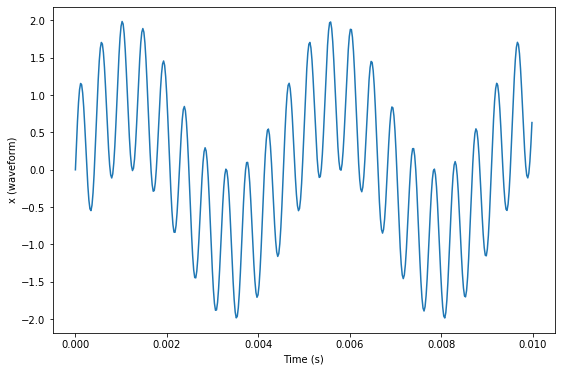

In [10]:
plt.plot(t, x)
plt.xlabel("Time (s)")
plt.ylabel("x (waveform)");

In [12]:
X = scipy.fftpack.fft(x) # FT
# discard the second half of FT with [:N//2]
# and discard the imaginary part (phase) with abs
X = np.abs(X[:N//2]) 
print(X.shape)

(220,)


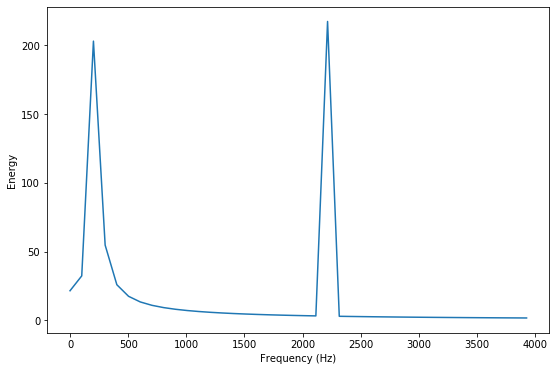

In [13]:
# calculate the frequency for each DFT bin
F = np.linspace(0.0, fs / 2, N//2) 
# plot only the low-frequency components
plt.plot(F[:40], X[:40])
plt.xlabel(r"Frequency (Hz)"); plt.ylabel("Energy");

### Anomaly detection in audio

Suppose we are working on preventive maintainence of industrial machinery. That is: we want to detect and predict possible problems in machines, and take them out of service for maintainence, before they break down.



One method we might use is audio recordings of the machines. A good mechanic is often able to diagnose car problems by ear, so maybe the same is true for our machines.

### Spectrogram




Because we have long recordings, we split the time-domain waveform into many short (overlapping) *windows* and for each, calculate the FT. That gives the *spectrogram*.

Now we have a 2D matrix: frequency versus time. The value indicates the *energy* in each frequency bin, at each time-step.

We visualise the spectrogram with time on the horizontal axis and power now on the vertical axis.

<center><img src=img/spectrogram.svg width=60%></center>

In [14]:
import scipy.io
import scipy.io.wavfile
import scipy.signal

In [15]:
fs, x = scipy.io.wavfile.read("data/furnace.wav")
print(fs) # sampling rate
print(x.shape)

44100
(367616,)


Let's look at the audio recording:

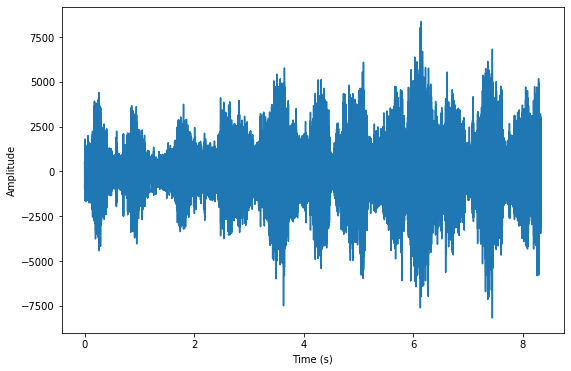

In [16]:
t = np.linspace(0, x.shape[0] / fs, x.shape[0])
plt.plot(t, x) 
plt.ylabel('Amplitude'); plt.xlabel('Time (s)'); 

Let's zoom in:

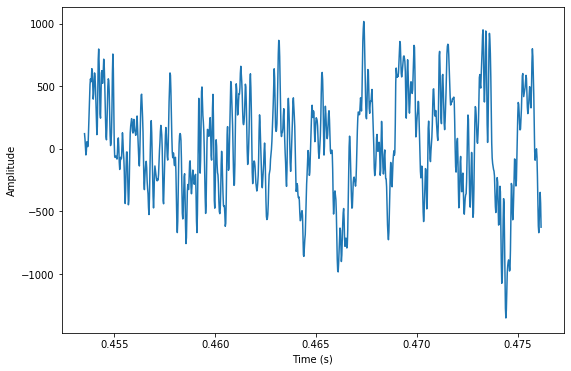

In [17]:
t = np.linspace(0, x.shape[0] / fs, x.shape[0])
plt.plot(t[20000:21000], x[20000:21000])
plt.ylabel('Amplitude'); plt.xlabel('Time (s)'); 

The `spectrogram` function computes the whole spectrogram and discards uninteresting parts to give `X`. It gives `f` and `t` with the frequency and time values for each "cell" in `X`. We pass in the window length in samples (usually a power of two).

In [18]:
f, t, X = scipy.signal.spectrogram(x, fs=fs, 
                                   nperseg=4096)
print(f.shape)
print(t.shape)
print(X.shape)

(2049,)
(102,)
(2049, 102)


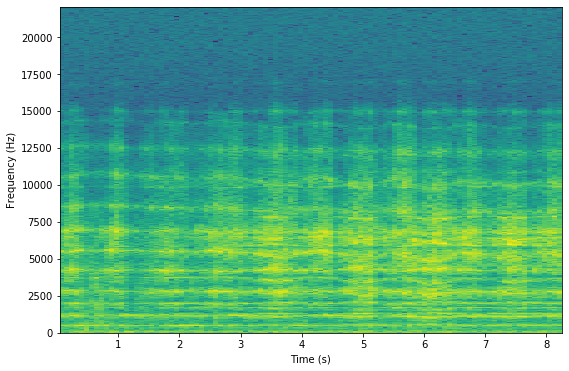

In [19]:
plt.pcolormesh(t, f, np.log(X));  
plt.ylabel('Frequency (Hz)'); 
plt.xlabel('Time (s)'); 

So far, we can't see anything useful. But suppose we know what the "warning signs" are like: let's zoom in on the lowest frequencies:

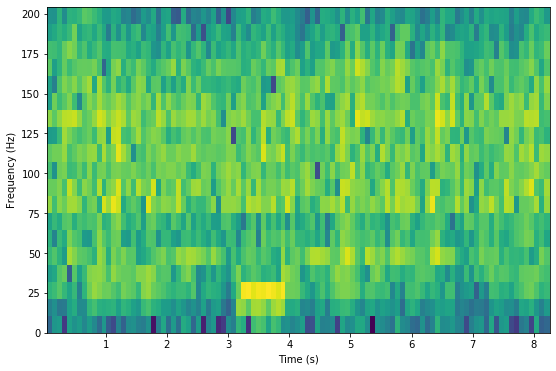

In [20]:
plt.pcolormesh(t, f[:20], np.log(X[:20, :])); 
plt.ylabel('Frequency (Hz)'); 
plt.xlabel('Time (s)'); 

Now we can see a very strong signal: between 3 and 4s there is an anomalous sound around 25Hz not present elsewhere. 

That was not audible nor visible in the original waveform!


We can now program a system to automatically flag large values in that band for inspection and maintainence.



If we don't know in advance what the "warning signs" are like, we could instead program an ML algorithm to detect any type of anomaly.

### What else can we use this for?

* The spectrogram contains more meaningful ("high-level") features than the raw data, so:
* Machine learning on audio (e.g. speech processing) usually starts with the spectrogram, eg:
* Shazam (automated song recognition in noisy environments) uses peaks in the spectrogram.
* Also non-audio signals: weather, stock markets, astronomy, ...
